# Изменение размера изображения
В этом задании вам предстоит познакомиться с процессом прореживания и интерполяции картинок с целью изменения их размера.



## Прореживание (децимация, downsampling)

Прореживание как одномерных сигналов, так и изображений, проводится в **два этапа**: сначала применяется фильтр нижних частот (ФНЧ), а затем отбрасываются лишние отсчеты сигнала. Фильтр необходим, чтобы избежать появления в спектре сигнала ложных частот - эффект **алиасинга (aliasing)**. Он связан с тем фактом, что при децимации дискретного сигнала мы отбрасываем некоторые отсчеты, что приводит к понижению частоты дискретизации сигнала и к дальнейшему появлению ложных частот в спектре. Для изображений этот эффект приводит к сильному искажению картинки при изменении её размера.

- Сначала посмотрим, что будет, если мы уменьшим изображение в 5 раз (по обоим измерениям) без предварительной фильтрации. Для этого напишите функцию `downsample_no_filter()`, затем отрисуйте получившееся изображение и отобразите его размер.

Resized image size:  [[ 74  78  71 ... 128 128 130]
 [ 74  71  72 ... 130 130 130]
 [ 69  70  68 ... 130 130 128]
 ...
 [ 70  70  71 ...  80  77  76]
 [ 69  70  68 ...  78  80  77]
 [ 71  68  68 ...  77  77  75]]


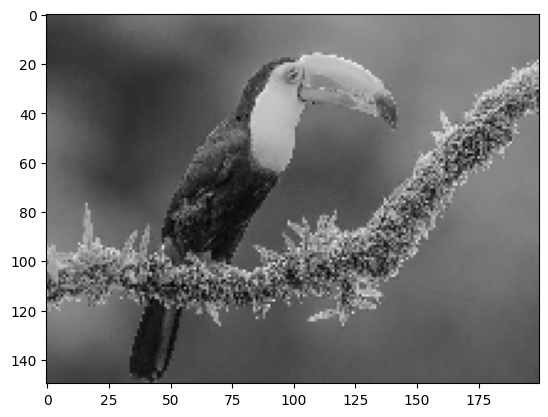

In [1]:
import IPython
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
import importlib
import resize_funcs as rf
# Метод convert('L') конвертирует цветную картинку в черно-белую
img = np.array(Image.open('.\\data\\toucan.jpeg').convert('L'))
# img = np.random.randint(0,255,(15,35))
plt.imshow(img, cmap='gray')
importlib.reload(rf)
# YOUR CODE HERE
img_down = rf.downsample_no_filter(img)
print("Resized image size: ", img_down)
plt.imshow(img_down,cmap='gray')

При таком подходе картинка будет достаточно сильно искажена. Попробуем применить фильтр к исходной картинке перед отбрасыванием отсчетов.

В первом задании было введено понятие линейного фильтра, а также рассмотрена теорема о свертке. В соответствии с этой теоремой фильтрацию изображений можно производить как в пространственной, так и в частотной области. В этом задании будет рассмотрена **фильтрация в пространственной области**

При линейной фильтрации изображения каждый выходной пиксель равен взвешенной сумме пикселей в пределах некоторой области исходной картинки (см. картинку). Иными словами, мы вычисляем **дискретную свертку**:

$$g(x, y)= f(x, y) * h(x, y) = \sum_{m=-a}^{m=a}\sum_{n=-b}^{n=b}f(m, n)h(x-m, y-n)= \sum_{m=-a}^{m=a}\sum_{n=-b}^{n=b}f(x-m, y-n)h(m, n).$$

Здесь $f(x,y)$, $g(x,y)$ - исходное и выходное изображения, $h(x, y)$ называют **ядром фильтра**, $a=\frac{M-1}{2}$, $b=\frac{N-1}{2}$, $M$, $N$ - размерности ядра.

Графическая интерпретация, достаточно наглядна: у нас имеется ядро фильтра, которое выступает в роли окна (или маски), скользящего по исходной картинке. Внутри окна вычисляем свертку пикселей изображения и ядра, а затем сдвигаем окно.

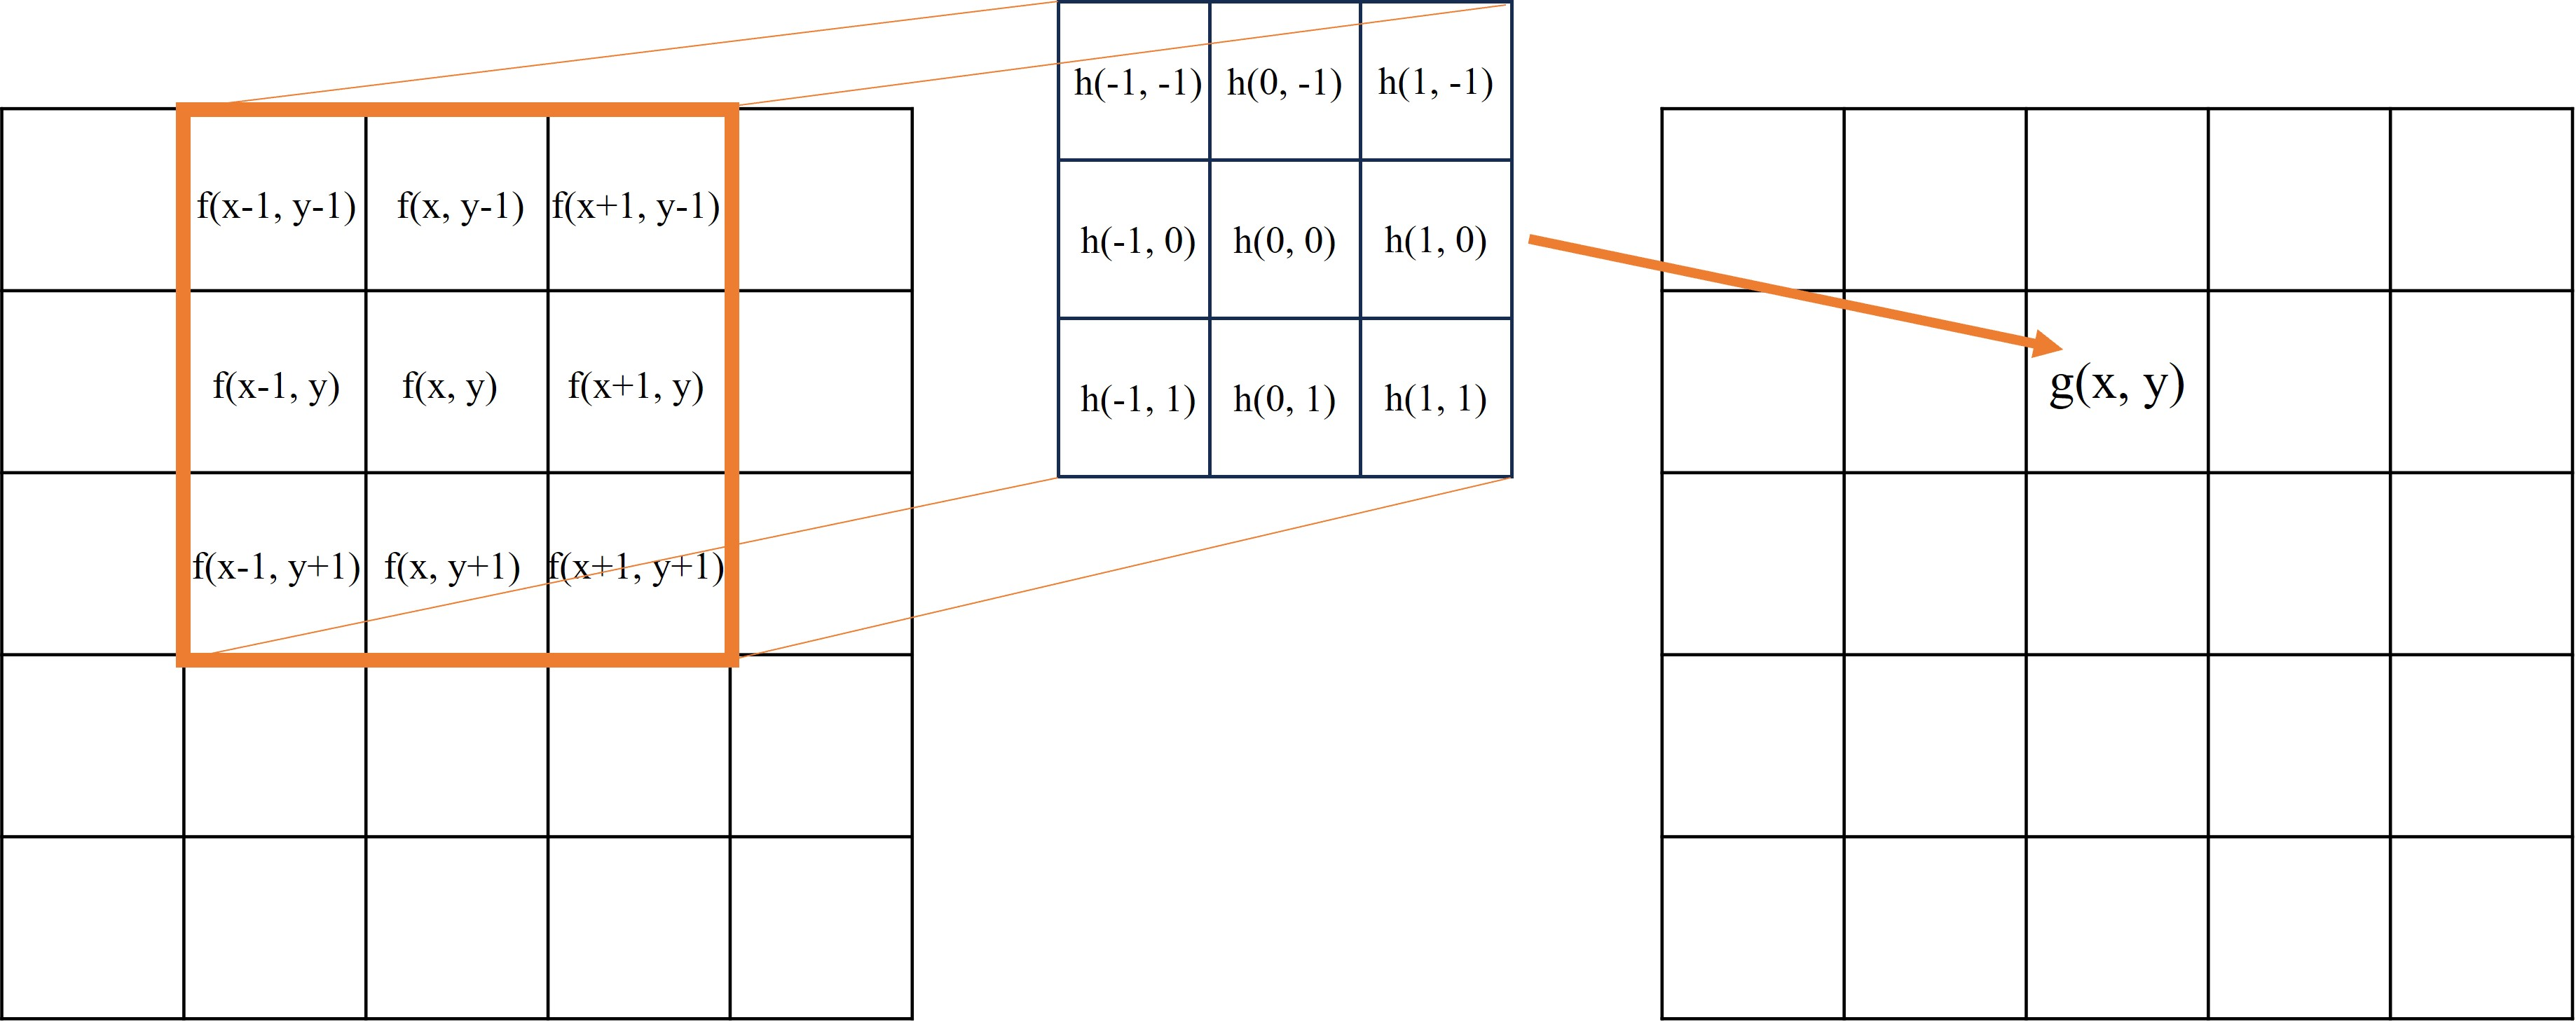

In [2]:
# Визуализация операции свертки
IPython.display.Image(filename='.\\data\\conv.jpg', width=900)

 - Можно заметить, что если найти описанным выше образом отфильтрованное изображение, то оно будет меньшего размера, нежели исходное. Дело в том, что ядро фильтра должно выходить за пределы изображения на краях (представьте окно $3\times 3$ и попробуйте поместить в его середину пиксель на краю или углу изображения). Для избежания подобной ситуации картинку можно дополнить пикселями по краям (**padding**).

    Напишите функцию `get_pad_img()`, которая принимает на вход изображение и желаемое количество нулей на границах и возвращает дополненное нулями изображение. Использовать готовую функцию `np.pad()` нельзя.

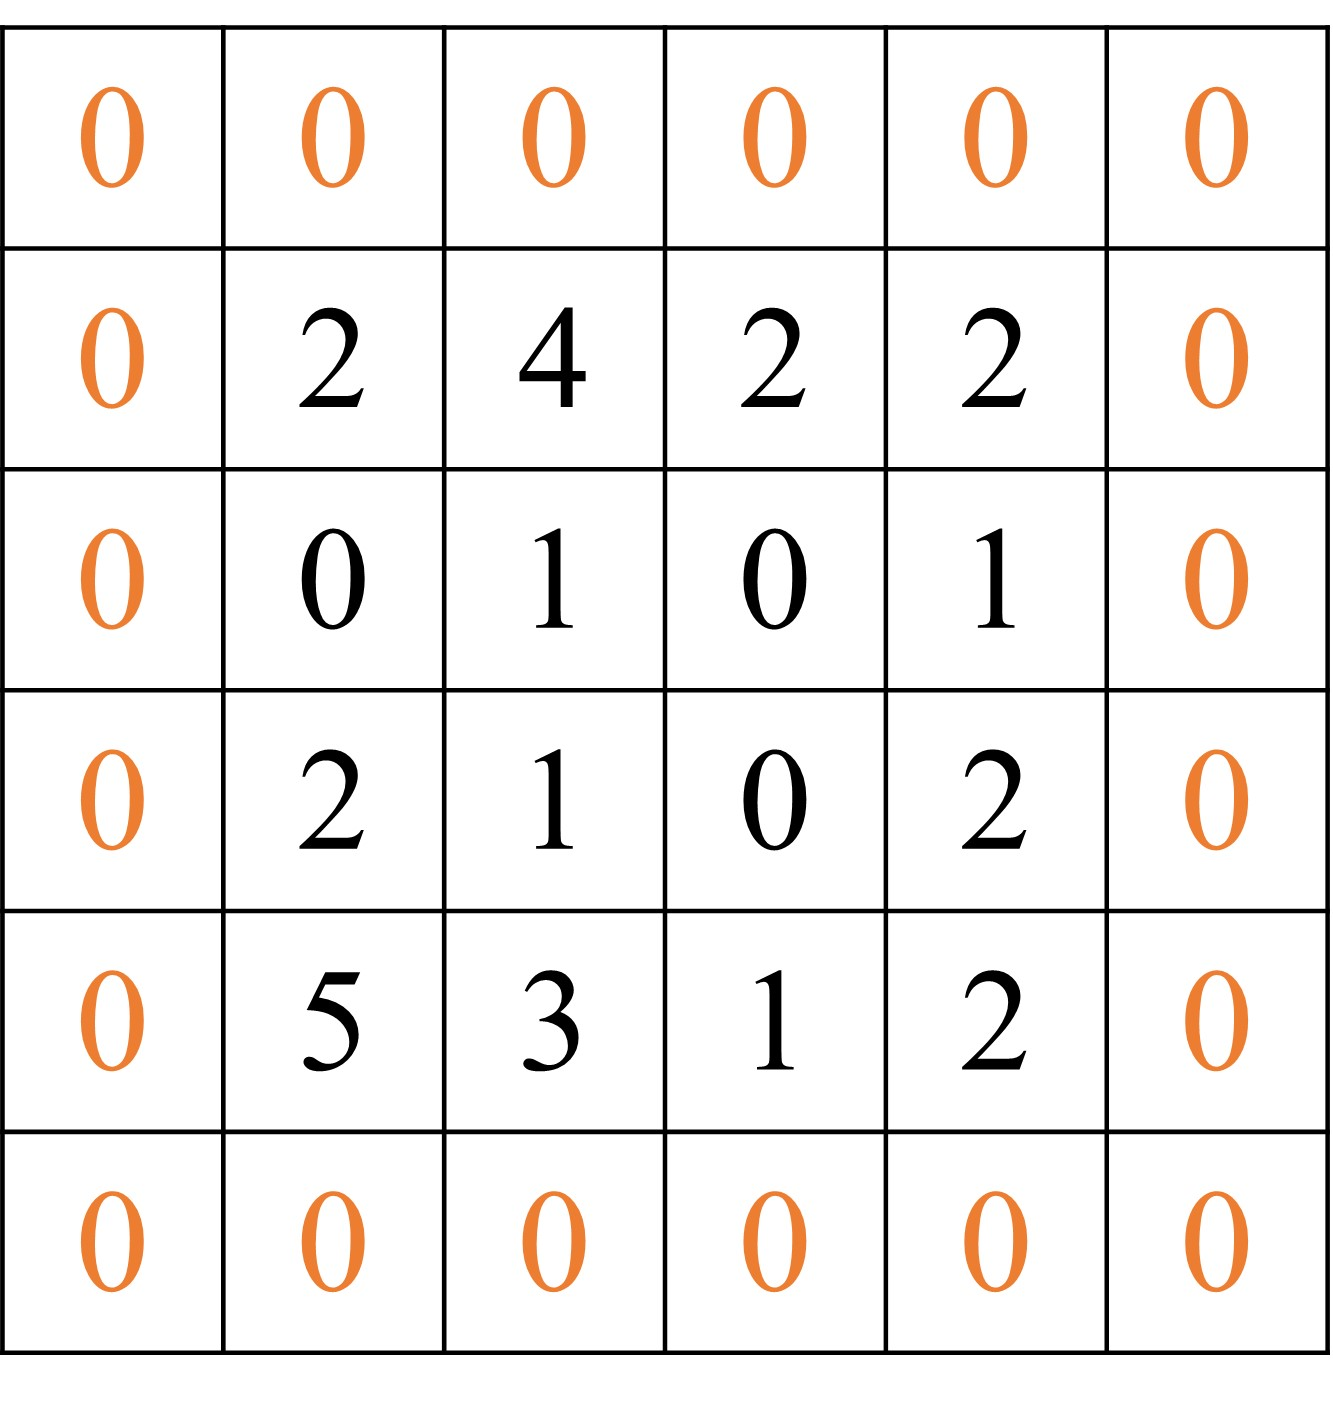

In [3]:
# Пример паддинга
IPython.display.Image(filename='.\\data\\padding.jpg', width=300)


 - Реализуйте функцию `convolve_2d()`, вычисляющую свертку двух двумерных сигналов. Размер выходного изображения должно совпадать с исходным; для добавления нулей используйте функцию `get_pad_img()`

- Для фильтрации существует множество разных фильтров. В этом задании нам потребуется *гауссовское ядро*. В одномерном случае оно задается формулой:
$$h_{gauss}(x) = \frac{1}{\sqrt{2\pi}\sigma}e^{-x^2/2\sigma^2}.$$

В двумерном случае справедлива формула:
$$h_{gauss}(x, y) = h_{gauss}(x)h_{gauss}(y)$$

Реализуйте функцию `gauss_kernel()`. На вход: размер ядра и среднеквадратическое отклонение $\sigma$. Возвращает функция гауссово ядро. Можете воспользоваться своей реализацией из 1-го задания.

In [4]:
# Выведите ядро фильтра любого размера в качестве примера

# YOUR CODE HERE
importlib.reload(rf)
print("Gauss kernel: ", rf.gauss_kernel((3,3),0.5))

Gauss kernel:  [[0.00583005 0.04307856 0.00583005]
 [0.04307856 0.31830989 0.04307856]
 [0.00583005 0.04307856 0.00583005]]


- Наконец, отфильтруем наше изображение с шумом с помощью реализованных функций. Примените созданный фильтр и после этого проредите картинку. Поэкспериментируйте с размерами ядра и со стандартным отклонением, которые визуально хорошо сглаживают изображение. Не забудьте предварительно добавить нулевые значения на границах, чтобы сохранить размер картинки.

Размер исходной картинки:  (750, 1000)
Размер уменьшенной картинки:  (150, 200)


Text(0.5, 1.0, 'Уменьшенная')

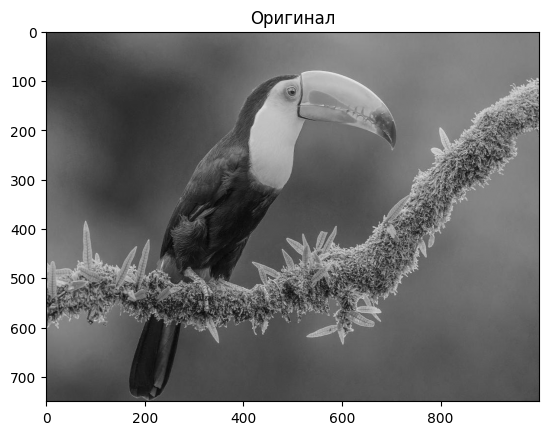

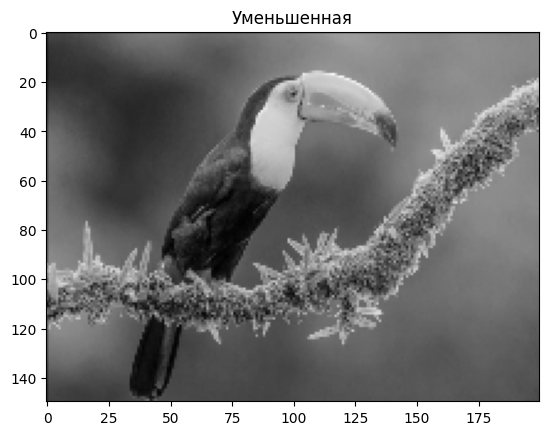

In [2]:
# YOUR CODE HERE

importlib.reload(rf)
kern = rf.gauss_kernel((3,3),1.2)
img_filt = rf.convolve_2d(img,kern)
img_resized = rf.downsample_no_filter(img_filt)

print("Размер исходной картинки: ", img.shape )
print("Размер уменьшенной картинки: ", img_resized.shape)

plt.imshow(img ,cmap='gray')
plt.title('Оригинал')
plt.figure()
plt.imshow(img_resized,cmap='gray')
plt.title('Уменьшенная')


# Интерполяция (upsampling)

При интерполяции происходит обратная операция: мы хотим повысить частоту дискретизации нашего сигнала. По сути мы хотим добавить новые отсчеты между уже имеющимися и тем самым увеличить размер картинки. Какие значения примут новые промежуточные отсчеты зависит от схемы, которую мы выберем, но **общий принцип одинаков**: мы добавляем желаемое количество нулей между пикселями, а затем пропускаем картинку через фильтр, в результате чего получаем интерполированное изображение.

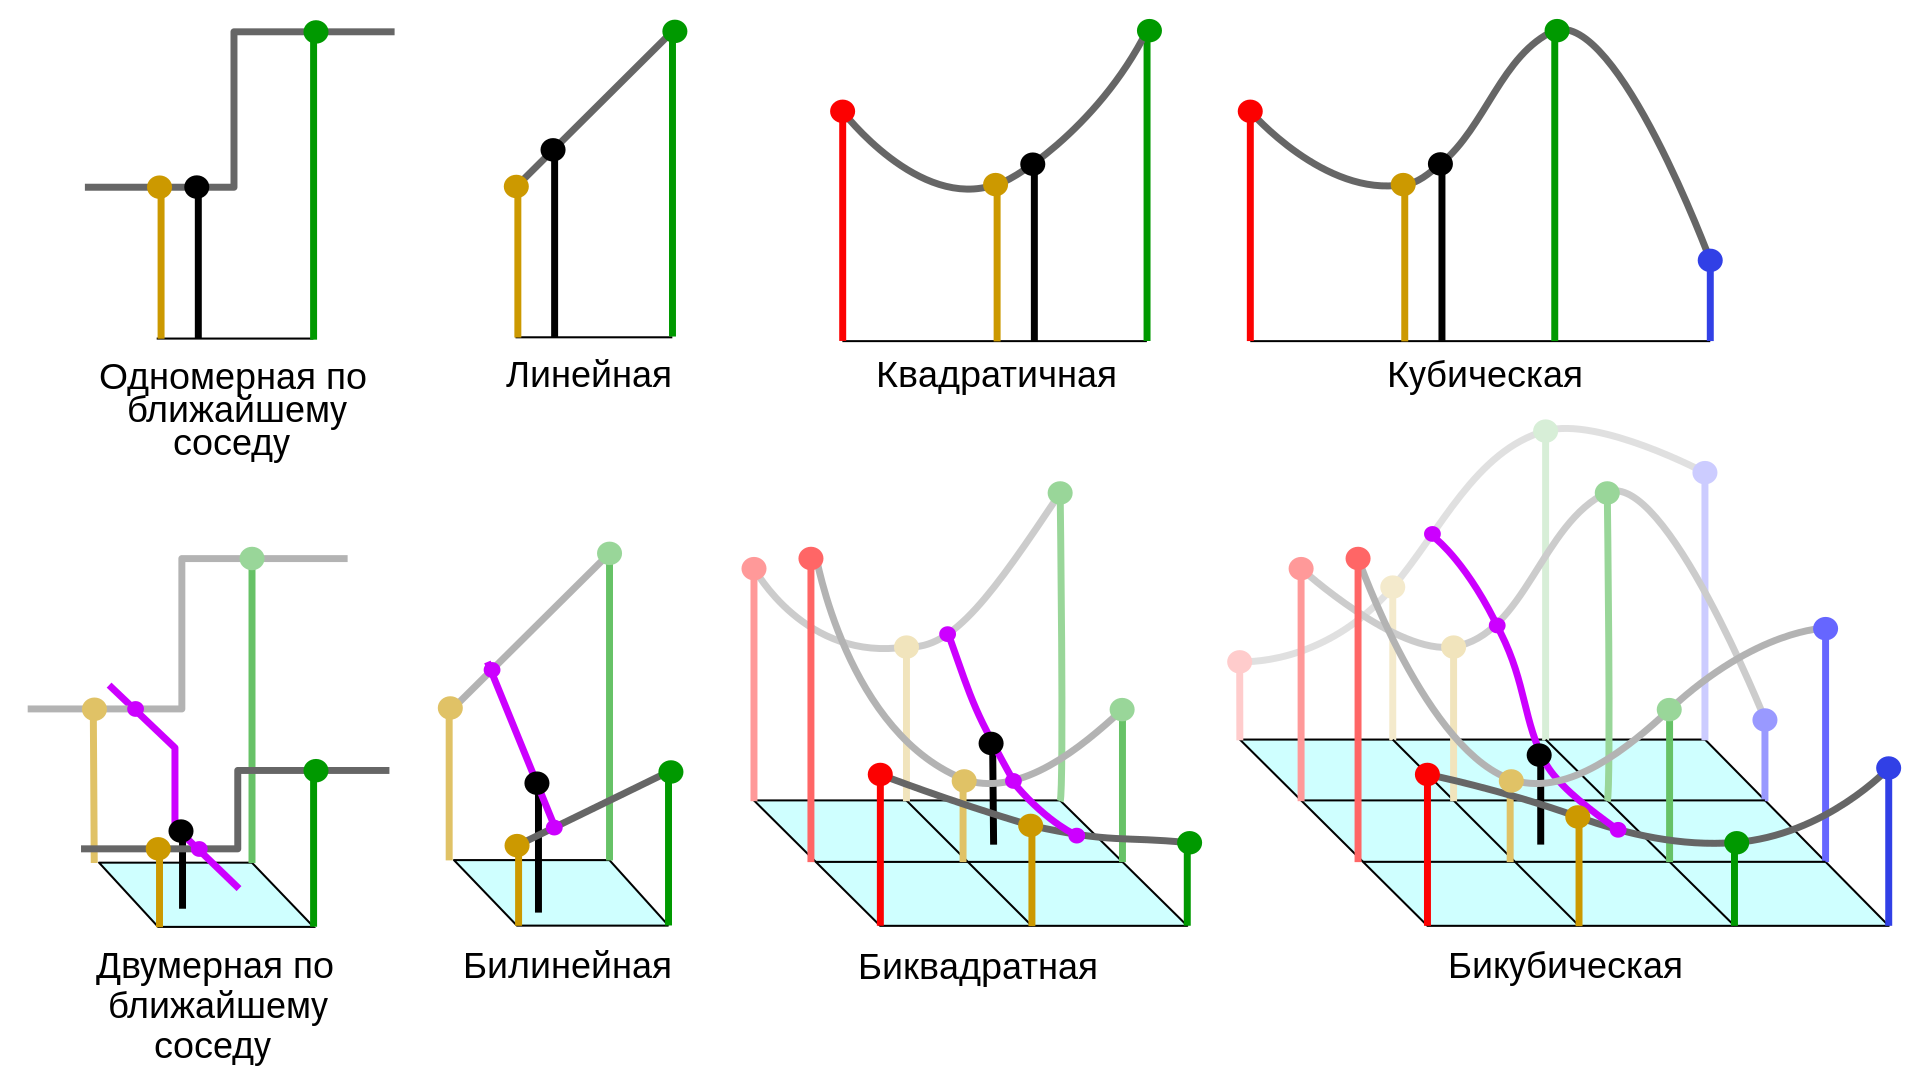

In [6]:
# Примеры 1D и 2D интерполяций. Известные значения функции выделены цветным, значение функции в интерполируемой точке - черным.
IPython.display.Image(filename='.\\data\\interp_types.png', width=800)

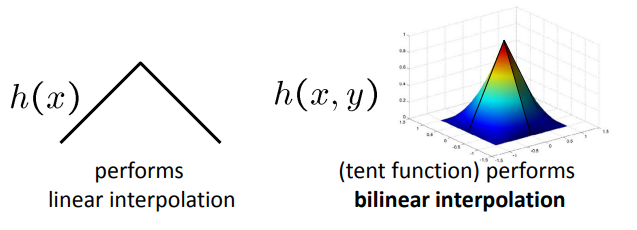

In [7]:
# Вид ядра для линейной и билинейной интерполяции
IPython.display.Image(filename='.\\data\\lin_bilin.png', width=700)

- В этом задании необходимо увеличить картинку, полученную в прошлом пункте, до исходного размера; для начала напишите функцию `expand_img()`, которая должна добавлять нужное количество нулевых строк и столбцов, чтобы получить размер исходного изображения.


In [8]:
# Отобразите дополненное нулями изображение

# YOUR CODE HERE
importlib.reload(rf)
print(rf.expand_img(img_resized,1).shape)

(750, 1000)



- Воспользуйтесь **билинейной интерполяцией**. Она является обобщением линейной интерполяции функции одной переменной для функции двух переменных. Ядро линейной интерполяции размера $L$ можно найти с помощью следующего выражения:

$$
h(x) = max(1-|\beta x|, 0),
$$
где $\beta = 1/(\frac{L}{2} + 1)$. Тогда ядро билинейной интерполяции можно получить как произведение одномерных ядер:

$$
h(x, y) = h(x)^T \cdot h(x)
$$
Реализуйте функцию `bilin_kernel()`, принимающую на вход параметр $L$ и возвращающую ядро фильтра.


In [9]:
# Выведите ядро фильтра любого размера в качестве примера

# YOUR CODE HERE
importlib.reload(rf)
print("Bilinear interpolation kernel: ", rf.bilin_kernel(3))

Bilinear interpolation kernel:  [[0.36 0.6  0.36]
 [0.6  1.   0.6 ]
 [0.36 0.6  0.36]]



- Наконец, примените билинейную интерполяцию к расширенному изображению и получите восстановленное изображение исходного размера. Воспользуйтесь библиотекой `scikit-image` для нахождения **structural similarity index measure (SSIM)** между исходным (до всех преобразований) и восстановленным  изображением. Этот индекс является мерой "похожести" двух изображений. Добейтесь значения SSIM не менее 0.5.

Размер исходгого изображения (до вообще всех преобразовний) (750, 1000)
Размер восстановленного изображения (750, 1000)
SSIM:  0.7015709095464226


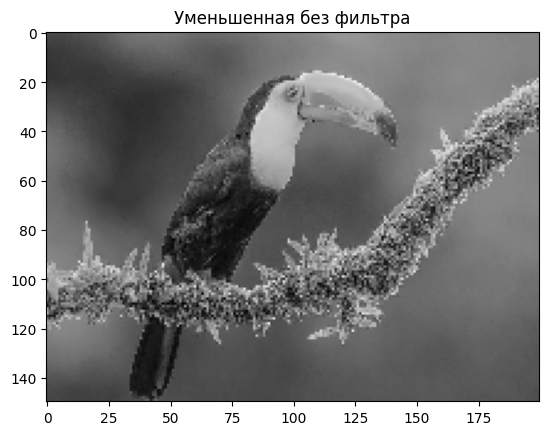

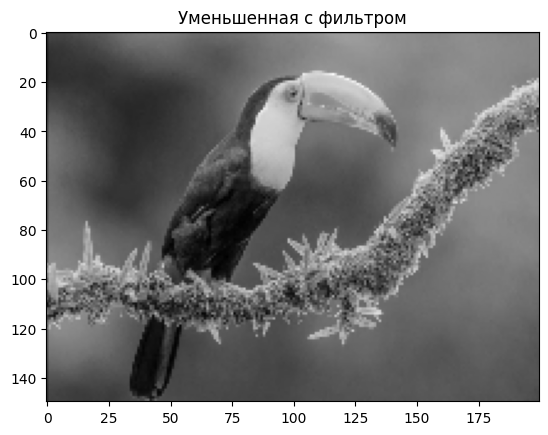

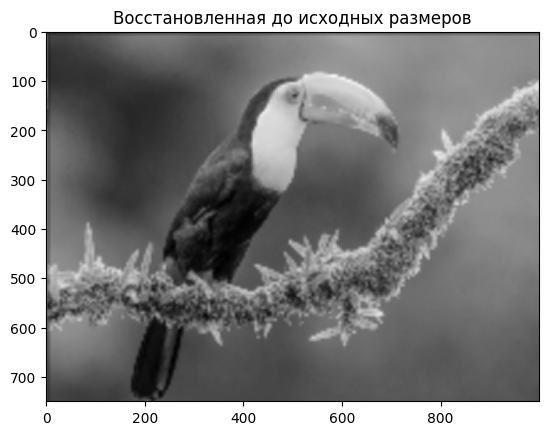

In [4]:
# YOUR CODE HERE
importlib.reload(rf)
from skimage.metrics import structural_similarity as ssim 

# Вывод изображений из прошлого
plt.imshow(rf.downsample_no_filter(img),cmap='gray')
plt.title('Уменьшенная без фильтра')
plt.figure()
plt.imshow(img_resized,cmap='gray')
plt.title('Уменьшенная с фильтром')

# Дополнение нулями для восстановления, здесь параметр это то во сколько уменьшали - 1, типа если уменьшили в 5 раз, то ставим 4 
img_e = rf.expand_img(img_resized,4)

kern = rf.bilin_kernel(10)
img_fft = np.fft.fft2(img_e)
kern_fft = np.fft.fft2(kern,s=img_e.shape)
result = img_fft * kern_fft 
result = np.fft.ifft2(result)

plt.figure()
plt.imshow(np.abs(result),cmap='gray')
plt.title('Восстановленная до исходных размеров')
print(f"Размер исходгого изображения (до вообще всех преобразовний) {img.shape}")
print(f"Размер восстановленного изображения {result.shape}")
range = max(np.abs(result).max(), img.max())-min(np.abs(result).min(),img.min())
print("SSIM: ", ssim(img ,np.abs(result),data_range=range))

## **Перед отправкой сохраните файлы в следующем формате: 02_Фамилия.ipynb и resize_funcs.py**